In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pgmpy.models import DynamicBayesianNetwork as DBN
from pgmpy.base import DAG
import networkx as nx

# Red Bayesiana Dinámica (DBN) 

En el análisis de series temporales, a menudo modelamos las relaciones entre variables que cambian con el tiempo. Una DBN es un tipo de modelo gráfico probabilístico que puede representar tales relaciones entre variables que cambian con el tiempo.

El código crea primero un objeto modelo DBN utilizando la clase DBN de pgmpy.models. El modelo está definido por un conjunto de aristas que conectan nodos que representan variables. Las variables en este modelo están etiquetadas como A, B, C y D. 

La notación ("A", 0) se refiere a la variable A en el paso de tiempo 0, mientras que ("A", 1) se refiere a la variable A en el paso de tiempo 1. Las aristas en el modelo indican la relación causal entre las variables. Las aristas del modelo indican relaciones causales entre las variables. Por ejemplo, la arista (("A", 0), ("B", 0)) significa que la variable A en el tiempo 0 tiene una influencia causal sobre la variable B en el tiempo 0.

El siguiente código genera algunos datos de series temporales simuladas utilizando numpy.random.randint(). Los datos tienen 1000 filas (pasos temporales) y 20 columnas (variables en diferentes pasos temporales). Cada columna representa una variable en un paso de tiempo concreto.

Finalmente, el código crea un objeto pandas DataFrame a partir de los datos y ajusta el modelo DBN a los datos utilizando el método fit() del objeto modelo. El método fit() utiliza los datos para estimar los parámetros del modelo, como las probabilidades condicionales de cada variable dadas sus variables padre en cada paso temporal.

In [7]:
model = DBN(

    [

        (("A", 0), ("B", 0)),

        (("A", 0), ("C", 0)),

        (("B", 0), ("D", 0)),

        (("C", 0), ("D", 0)),

        (("A", 0), ("A", 1)),

        (("B", 0), ("B", 1)),

        (("C", 0), ("C", 1)),

        (("D", 0), ("D", 1)),

    ]

)

,"(A, 0)","(B, 0)","(C, 0)","(D, 0)","(A, 1)","(B, 1)","(C, 1)","(D, 1)","(A, 2)","(B, 2)","(C, 2)","(D, 2)","(A, 3)","(B, 3)","(C, 3)","(D, 3)","(A, 4)","(B, 4)","(C, 4)","(D, 4)"
0,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,0,0,0,0,0
1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0
2,0,1,1,0,1,0,1,0,0,0,1,1,1,1,1,1,1,1,0,0
3,0,1,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,1
4,1,0,0,0,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1


In [10]:
data = np.random.randint(low=0, high=2, size=(1000, 20))

np.shape(data)

(1000, 20)

In [11]:
colnames = []

for t in range(5):
    colnames.extend([("A", t), ("B", t), ("C", t), ("D", t)])

print(len(colnames))

20


In [13]:
df = pd.DataFrame(data, columns=colnames)
df.head()

,"(A, 0)","(B, 0)","(C, 0)","(D, 0)","(A, 1)","(B, 1)","(C, 1)","(D, 1)","(A, 2)","(B, 2)","(C, 2)","(D, 2)","(A, 3)","(B, 3)","(C, 3)","(D, 3)","(A, 4)","(B, 4)","(C, 4)","(D, 4)"
0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,0,1,0,1,0,0
1,1,0,0,0,0,1,0,1,0,1,1,0,1,1,1,0,1,0,0,0
2,1,0,0,1,1,0,0,1,1,0,1,0,0,1,0,1,1,0,1,1
3,0,0,1,0,0,1,1,0,1,0,1,0,1,1,1,0,0,0,0,0
4,1,0,0,0,1,1,0,1,0,0,0,0,1,1,1,0,0,0,0,1


In [20]:
model.fit(df, estimator='MLE')

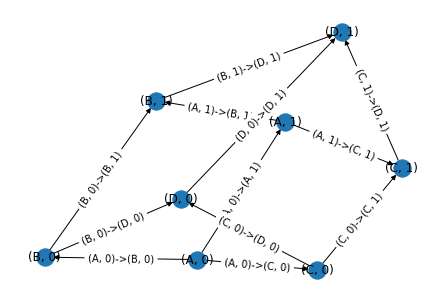

In [21]:
# Get the edges from the DBN model
edges = model.edges()

# Create a directed graph from the edges
G = nx.DiGraph(edges)

# Draw the graph using networkx
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{u}->{v}" for u, v in G.edges()})

# Show the plot
plt.show()

In [6]:
# Get the estimated CPDs for each node in the model
cpds = model.get_cpds()

np.shape(cpds)

(8,)

In [22]:
# Print the CPDs for node A at time step 0
for i in range(len(cpds)):
    print("CPD", i)
    print(cpds[i])

CPD 0
+-----------+--------------------+--------------------+
| (A, 0)    | (A, 0)(0)          | (A, 0)(1)          |
+-----------+--------------------+--------------------+
| (C, 0)(0) | 0.4987452056727958 | 0.4658715936854872 |
+-----------+--------------------+--------------------+
| (C, 0)(1) | 0.5012547943272042 | 0.5341284063145127 |
+-----------+--------------------+--------------------+
CPD 1
+-----------+--------------------+---------------------+
| (A, 0)    | (A, 0)(0)          | (A, 0)(1)           |
+-----------+--------------------+---------------------+
| (B, 0)(0) | 0.5063200325456225 | 0.5096888402485021  |
+-----------+--------------------+---------------------+
| (B, 0)(1) | 0.4936799674543775 | 0.49031115975149775 |
+-----------+--------------------+---------------------+
CPD 2
+-----------+--------------------+-----+--------------------+
| (B, 0)    | (B, 0)(0)          | ... | (B, 0)(1)          |
+-----------+--------------------+-----+--------------------+
| (C,

Esto imprime los CPDs estimados para el nodo A en el paso de tiempo 0, que representan las probabilidades de cada valor posible del nodo A dados los valores de sus nodos padres (si los hay). Puede modificar este código para imprimir los CPDs estimados para cualquier otro nodo y paso de tiempo en el modelo.